In [14]:
import os 
import pandas as pd
import sys
import glob
import matplotlib.pyplot as plt

Matplotlib created a temporary config/cache directory at /scratch/slurm-job.3349795/matplotlib-pomrmt3p because the default path (/cluster/customapps/biomed/grlab/users/prelotla/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [3]:
### INPUTS ###
indir = '/cluster/work/grlab/projects/projects2020_OHSU/proteomics/tide_search_joint'


'fA'

In [95]:
search_res = glob.glob(os.path.join(indir, '*', '*', 'tide-search.txt'))

samples = set()
res = {}
for i, path in enumerate(search_res):
    sample = path.split('/')[-3]
    fraction = path.split('/')[-2].split('_')[-1]
    if sample not in samples:
        try:
            t = len(res)
            print(f'... unique sequences {t}')
            res = {}
        except:
            pass
        print(sample)
    samples.add(sample)
    df = pd.read_csv(path, sep = '\t')
    tmp_plot = df.loc[df['target/decoy'] == 'target']
    tot = len(tmp_plot['original target sequence'].unique())
    selected = tmp_plot.loc[(tmp_plot['b/y ions fraction'] > 0.8) & (tmp_plot['xcorr rank'] < 5) ]
    res.update(selected['original target sequence'])
    n = len(selected['original target sequence'].unique())
    print(f'... fraction {fraction}: {n} unique matches from {tot}')


... unique sequences 0
TCGA-25-1319
... fraction f20: 21 unique matches from 55052
... fraction f24: 17 unique matches from 56747
... fraction f19: 13 unique matches from 53843
... fraction f04: 12 unique matches from 56950
... fraction f05: 10 unique matches from 54633
... fraction f07: 13 unique matches from 56090
... fraction f01: 15 unique matches from 55150
... fraction f22: 10 unique matches from 56100
... fraction f15: 10 unique matches from 56716
... fraction f17: 12 unique matches from 54576
... fraction f14: 12 unique matches from 54094
... fraction f23: 11 unique matches from 57238
... fraction f18: 11 unique matches from 53938
... fraction f09: 6 unique matches from 57268
... fraction f21: 9 unique matches from 52782
... fraction f10: 5 unique matches from 56105
... fraction f02: 14 unique matches from 55532
... fraction f06: 11 unique matches from 56868
... fraction f16: 9 unique matches from 55681
... fraction f12: 11 unique matches from 54921
... fraction f03: 14 unique 

... fraction F19: 28 unique matches from 27317
... fraction POOL: 87 unique matches from 26766
... fraction F3: 36 unique matches from 26852
... fraction F9: 29 unique matches from 27279
... unique sequences 1092
TCGA-C8-A12P
... fraction f16: 5 unique matches from 4566
... fraction f12: 8 unique matches from 4567
... fraction f04: 5 unique matches from 4600
... fraction f02: 2 unique matches from 4524
... fraction f07: 6 unique matches from 4657
... fraction f19: 2 unique matches from 4475
... fraction f18: 5 unique matches from 4521
... fraction f13: 4 unique matches from 4642
... fraction f09: 8 unique matches from 4621
... fraction f03: 4 unique matches from 4506
... fraction f08: 3 unique matches from 4603
... fraction f10: 7 unique matches from 4660
... fraction f11: 8 unique matches from 4645
... fraction f20: 5 unique matches from 4489
... fraction f17: 6 unique matches from 4585
... fraction f24: 4 unique matches from 4537
... fraction f01: 3 unique matches from 4485
... fract

In [81]:
tmp_plot.shape

(227010, 21)

In [82]:
len(tmp_plot['original target sequence'].unique())

56747

In [84]:
tmp_plot.loc[(tmp_plot['b/y ions fraction'] > 0.8) & (tmp_plot['xcorr rank'] < 5) ].shape

(28, 21)

In [78]:
df.iloc[0]

file                         /cluster/work/grlab/projects/TCGA/PanCanAtlas/...
scan                                                                      3510
charge                                                                       2
spectrum precursor m/z                                                352.6817
spectrum neutral mass                                                 703.3489
peptide mass                                                          703.3735
delta_cn                                                              0.232592
delta_lcn                                                             0.232592
xcorr score                                                           0.785227
b/y ions matched                                                             5
b/y ions total                                                              10
b/y ions fraction                                                          0.5
xcorr rank                                          

In [75]:
def plot_stats(df, plot=True):
    if plot:
        val = ['b/y ions fraction', 'xcorr score', 'xcorr rank']
        tmp_plot = df.loc[df['target/decoy'] == 'target']
        for v in val:
            plt.hist(tmp_plot[ v ], alpha=0.7, bins = 50)
            plt.xlabel(v)
            plt.ylabel('counts')
            plt.show()

        val = ['xcorr score', 'xcorr rank']
        x_var = 'b/y ions fraction'
        for v in val:
            plt.scatter(tmp_plot[x_var], tmp_plot[v], marker='>', linewidth=1, alpha=0.7)
            plt.ylabel(v)
            plt.xlabel(x_var)
            plt.show()

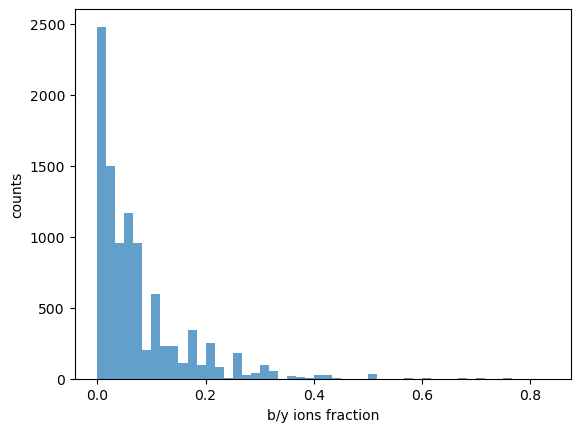

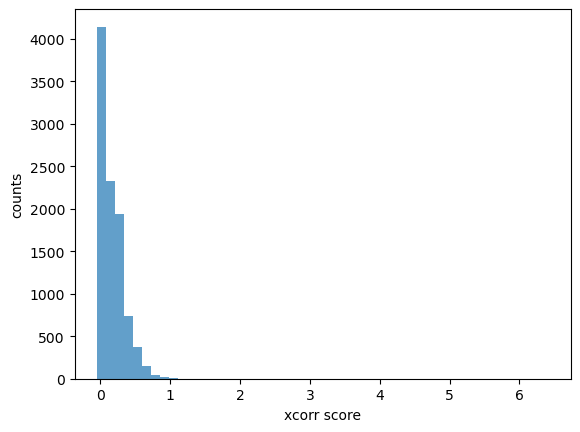

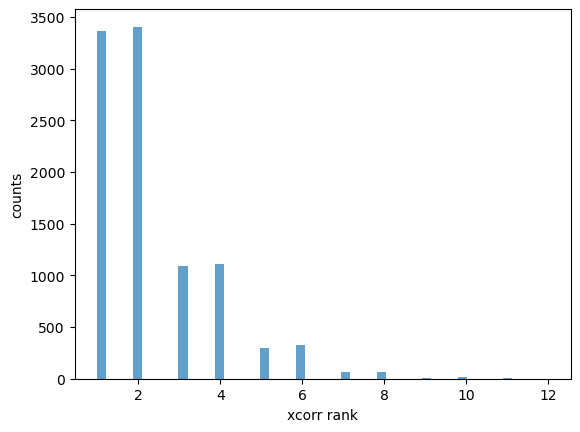

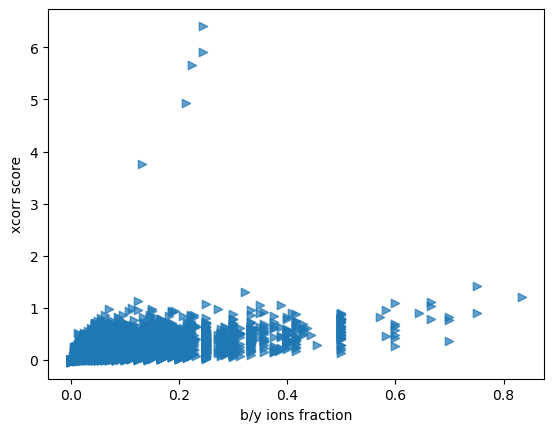

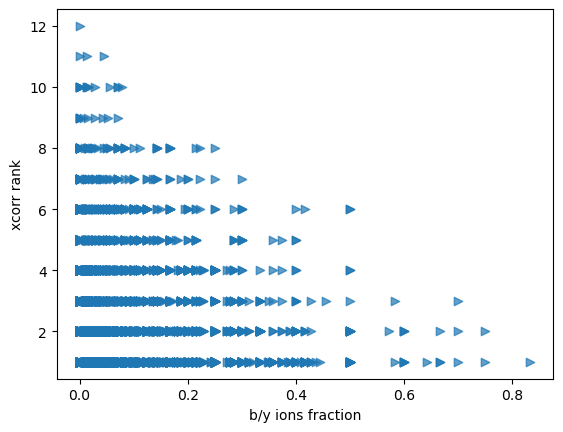

In [76]:
plot_stats(df)